# О вкусной и здоровой пище.
*(проект N 3)*

In [547]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from collections import OrderedDict
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [548]:
RANDOM_SEED = 42

In [549]:
# !pip freeze > requirements.txt

# DATA

In [550]:
# DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [551]:
df_train.head(20)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,['Italian'],826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


In [552]:
df_train.tail(10)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
39990,id_1187,Oporto,"['European', 'Portuguese']",1188.0,4.5,NaN,14.0,"[['Traditional ""home cooked"" food for an ""eco....",/Restaurant_Review-g189180-d3612719-Reviews-D_...,d3612719
39991,id_6655,Paris,"['French', 'Contemporary', 'Fusion', 'Gastropub']",6656.0,5.0,$$ - $$$,5.0,"[[], []]",/Restaurant_Review-g187147-d13224611-Reviews-L...,d13224611
39992,id_13,Stockholm,"['Swedish', 'Scandinavian', 'Vegetarian Friend...",14.0,4.5,$$ - $$$,1162.0,"[['Great Viking Dinner', 'A foot stompingly go...",/Restaurant_Review-g189852-d2560559-Reviews-Ai...,d2560559
39993,id_6057,Paris,NaN,6058.0,4.0,NaN,16.0,"[['Naught but VERY nice', 'Yum'], ['01/23/2017...",/Restaurant_Review-g187147-d10532509-Reviews-B...,d10532509
39994,id_7074,Paris,"['French', 'Fast Food', 'Mediterranean', 'Heal...",7075.0,4.5,$$ - $$$,6.0,"[[], []]",/Restaurant_Review-g187147-d12621988-Reviews-C...,d12621988
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838
39999,id_4824,Milan,['Spanish'],4827.0,3.0,$$ - $$$,260.0,"[['Average', 'Nice an informal'], ['01/31/2016...",/Restaurant_Review-g187849-d1109020-Reviews-Ta...,d1109020


In [553]:
df_test.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [554]:
sample_submission.head()

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [555]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1  # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
# в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0

df = df_test.append(df_train, sort=False).reset_index(drop=True)  # объединяем

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

Приводим имена колонок к более удобному виду

In [557]:
df.columns = [str(x).lower() for x in df.columns]
df.columns = ['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range', 'number_of_reviews',
              'reviews', 'url_ta', 'id_ta', 'sample', 'rating']  
df

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


## Обработка NAN 


In [558]:
df['number_of_rev_is_NAN'] = pd.isna(df['number_of_reviews']).astype('uint8')
# выношу все пропуски в отдельный признак. А пропуски заполняю нулем.
df['number_of_reviews'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         50000 non-null  object 
 1   city                  50000 non-null  object 
 2   cuisine_style         38410 non-null  object 
 3   ranking               50000 non-null  float64
 4   price_range           32639 non-null  object 
 5   number_of_reviews     50000 non-null  float64
 6   reviews               49998 non-null  object 
 7   url_ta                50000 non-null  object 
 8   id_ta                 50000 non-null  object 
 9   sample                50000 non-null  int64  
 10  rating                50000 non-null  float64
 11  number_of_rev_is_NAN  50000 non-null  uint8  
dtypes: float64(3), int64(1), object(7), uint8(1)
memory usage: 4.2+ MB


In [559]:
df['cuisine_style_is_NAN'] = pd.isna(df['cuisine_style']).astype('uint8')  # выношу все пропуски в отдельный признак
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurant_id         50000 non-null  object 
 1   city                  50000 non-null  object 
 2   cuisine_style         38410 non-null  object 
 3   ranking               50000 non-null  float64
 4   price_range           32639 non-null  object 
 5   number_of_reviews     50000 non-null  float64
 6   reviews               49998 non-null  object 
 7   url_ta                50000 non-null  object 
 8   id_ta                 50000 non-null  object 
 9   sample                50000 non-null  int64  
 10  rating                50000 non-null  float64
 11  number_of_rev_is_NAN  50000 non-null  uint8  
 12  cuisine_style_is_NAN  50000 non-null  uint8  
dtypes: float64(3), int64(1), object(7), uint8(2)
memory usage: 4.3+ MB


In [560]:
# заполняю пропущенные значения в колонке
df['reviews'].fillna('[[],[]]', inplace=True)
df['reviews'][1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [561]:
da = []

pattern = re.compile('\d+\/\d+\/\d+')  # функция которая ищет даты отзывов

def find_date(x):
    try:
        if x == 0:
            return []
        return pattern.findall(x)
    except:
        print(x)
        raise

 # создаю колонку с датами отзывов
df['review_date'] = df['reviews'].apply(find_date)
df['review_date']

0                              []
1        [12/05/2017, 10/29/2017]
2        [12/28/2017, 12/06/2017]
3        [12/06/2017, 11/22/2017]
4        [02/08/2018, 01/24/2018]
                   ...           
49995    [12/16/2017, 11/12/2017]
49996    [12/21/2017, 12/12/2017]
49997    [11/03/2016, 04/12/2008]
49998    [07/11/2017, 06/18/2017]
49999    [01/31/2016, 07/04/2012]
Name: review_date, Length: 50000, dtype: object

In [562]:
def date_of_last_reviews(x):
    ''' функция, которая переводит все даты в единый фотмат - год, день, месяц '''
    
    if len(x) > 0:
        def year(a): return '20'+a if len(a) == 2 else a

        def d_transf(i): return year(i[2])+i[1]+i[0] if int(i[0]) <= 12 else year(i[2])+i[0]+i[1]

        res = sorted(
            [pd.to_datetime(d_transf(i.split('/')), format="%Y%d%m") for i in x])
        da.append(res[-1]-res[0])
        return res[-1]
    else:
        return np.nan

# создаю колонку с последней датой отзыва
df['last_review_date'] = df['review_date'].apply(date_of_last_reviews)  

<AxesSubplot:>

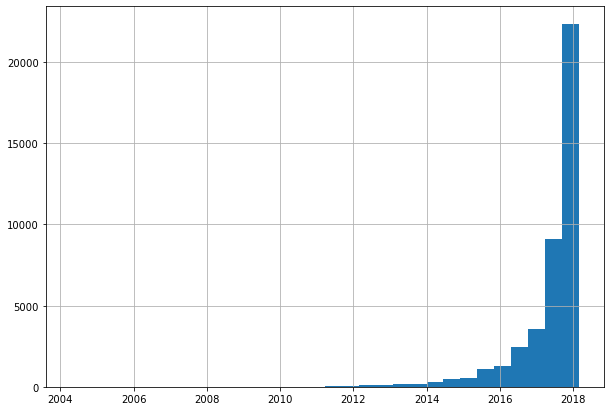

In [563]:
# df['last_review_date'].dt.year.value_counts().sort_values()[100:500]
df['last_review_date'].hist(bins=30)

Подавляющее большинство данных датированы позднее 2012. Можно предположить, что более ранние даты неважны с точки зрения влияния на предсказание, а 2004 год и т.п. - явная ошибка.

Поэтому все даты ранее 2012г. принимаю равными 2012г.

Создаю колонку с кол-вом дней прошедших с последнего отзыва

In [564]:
def recency(x):
    if x is pd.NaT or x < pd.Timestamp('2012-01-01'):
        x = pd.Timestamp('2012-01-01')
    try:
        y = (pd.Timestamp('2021-09-20')-x).days
    except:
        y = -1
    return y


df['last_review_recency'] = df['last_review_date'].apply(recency)
df['last_review_recency']

0        3550
1        1385
2        1362
3        1384
4        1320
         ... 
49995    1374
49996    1369
49997    1782
49998    1532
49999    2059
Name: last_review_recency, Length: 50000, dtype: int64

<AxesSubplot:>

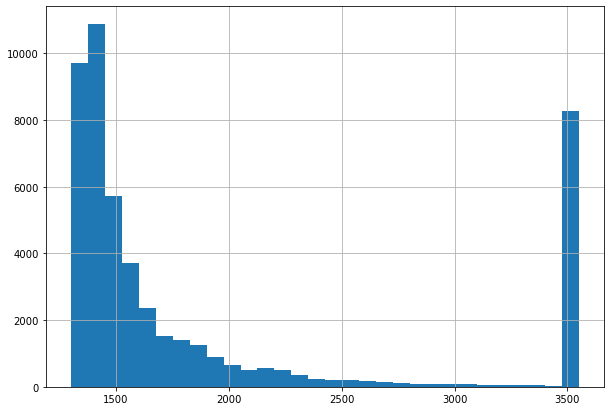

In [565]:
df['last_review_recency'].hist(bins=30)

### Обработка признаков

In [566]:
df['price_range'] = df['price_range'].map({'$': 0,        # перевожу цены в ресторане в числовой вид
                                           '$$ - $$$': 1,
                                           '$$$$': 2})
df['price_range'].value_counts()

1.0    23041
0.0     7816
2.0     1782
Name: price_range, dtype: int64

In [567]:
# заменяю пропуски на наиболее частое значение: 1.
df['price_range'] = df['price_range'].fillna(1)
df['price_range'].value_counts()

1.0    40402
0.0     7816
2.0     1782
Name: price_range, dtype: int64

In [568]:
# делаю столбец cuisine_style столбцом со списками кухонь
def fr(r):
    if r is np.nan:
        return r
    rr = eval(r)
    return rr


df['cuisine_style'] = df['cuisine_style'].apply(fr)
# type(df['cuisine_style'][0])

In [569]:
# создаю столбец с количеством кухонь в каждом ресторане
def len_col(x):
    try:
        if len(x) > 0:
            return len(x)
    except TypeError:
        return 0


df['len_cuisine'] = df['cuisine_style'].apply(len_col)
df.head(5)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_rev_is_NAN,cuisine_style_is_NAN,review_date,last_review_date,last_review_recency,len_cuisine
0,id_0,Paris,"[Bar, Pub]",12963.0,1.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,[],NaT,3550,2
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,1.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,"[12/05/2017, 10/29/2017]",2017-12-05,1385,5
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,1.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,"[12/28/2017, 12/06/2017]",2017-12-28,1362,1
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,2.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,"[12/06/2017, 11/22/2017]",2017-12-06,1384,5
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,2.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,"[02/08/2018, 01/24/2018]",2018-02-08,1320,6


Делаю столбец id_ta столбцом только с числами т.к подозреваю, что этот номер может соответствовать порядку регистрации ресторанов на сайте, что может оказаться полезным для предсказания.


In [570]:
df['id_ta'] = df['id_ta'].apply(lambda x: int(x[1:]))
df['id_ta']

0        10746918
1         6674944
2        13129638
3          680417
4         1112354
           ...   
49995     2104414
49996     1800036
49997      947615
49998     1100838
49999     1109020
Name: id_ta, Length: 50000, dtype: int64

In [571]:
def city_dict(data):
    ''' добавляю столбец is_capital, в котором отметчаю является ли город столицей'''
    is_capital_dict = {
        'Paris': 1,
        'Stockholm': 1,
        'London': 1,
        'Berlin': 1,
        'Munich': 0,
        'Oporto': 0,
        'Milan': 0,
        'Bratislava': 1,
        'Vienna': 1,
        'Rome': 1,
        'Barcelona': 0,
        'Madrid': 1,
        'Dublin': 1,
        'Brussels': 1,
        'Zurich': 0,
        'Warsaw': 1,
        'Budapest': 1,
        'Copenhagen': 1,
        'Amsterdam': 1,
        'Lyon': 0,
        'Hamburg': 0,
        'Lisbon': 1,
        'Prague': 1,
        'Oslo': 1,
        'Helsinki': 1,
        'Edinburgh': 1,
        'Geneva': 0,
        'Ljubljana': 1,
        'Athens': 1,
        'Luxembourg': 1,
        'Krakow': 0
    }

    df['is_capital'] = df['city'].map(is_capital_dict)


df.apply(city_dict)
df

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_rev_is_NAN,cuisine_style_is_NAN,review_date,last_review_date,last_review_recency,len_cuisine,is_capital
0,id_0,Paris,"[Bar, Pub]",12963.0,1.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918,0,0.0,0,0,[],NaT,3550,2,1
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,1.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,0.0,0,0,"[12/05/2017, 10/29/2017]",2017-12-05,1385,5,1
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,1.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,13129638,0,0.0,0,0,"[12/28/2017, 12/06/2017]",2017-12-28,1362,1,1
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,2.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,680417,0,0.0,0,0,"[12/06/2017, 11/22/2017]",2017-12-06,1384,5,1
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,2.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,1112354,0,0.0,0,0,"[02/08/2018, 01/24/2018]",2018-02-08,1320,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,1.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,2104414,1,4.5,0,0,"[12/16/2017, 11/12/2017]",2017-12-16,1374,4,0
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,1.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,1800036,1,3.5,0,0,"[12/21/2017, 12/12/2017]",2017-12-21,1369,5,1
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,1.0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,947615,1,4.5,0,0,"[11/03/2016, 04/12/2008]",2016-11-03,1782,2,1
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,1.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,1100838,1,4.0,0,0,"[07/11/2017, 06/18/2017]",2017-07-11,1532,5,1


In [572]:
# создаю колонку с кол-вом ресторанова в сети
df['net_count'] = df['restaurant_id'].map(
    dict(df.restaurant_id.value_counts()))
# и колонку которая покажет является ли ресторан сетевым или нет
df['net_restaurant'] = (df['net_count'] > 1).astype(int)
df[df['net_restaurant'] == 0]

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_rev_is_NAN,cuisine_style_is_NAN,review_date,last_review_date,last_review_recency,len_cuisine,is_capital,net_count,net_restaurant
2424,id_2424,Paris,[Fast Food],10558.0,1.0,4.0,"[['Kefta, Shawarma, Kebab Paradise', 'Be sure ...",/Restaurant_Review-g187147-d4596123-Reviews-Lu...,4596123,0,0.0,0,0,"[01/26/2017, 07/12/2015]",2017-01-26,1698,1,1,1,0
2861,id_2861,Dublin,"[Mediterranean, European, Spanish, Wine Bar, V...",294.0,1.0,411.0,"[['Wine and tapas', 'very nice Tapas bar. love...",/Restaurant_Review-g186605-d778741-Reviews-The...,778741,0,0.0,0,0,"[12/18/2017, 12/08/2017]",2017-12-18,1372,6,1,1,0
2964,id_2964,Lisbon,"[Mediterranean, European, Portuguese]",1068.0,0.0,181.0,"[['A local took us there', 'okay'], ['07/09/20...",/Restaurant_Review-g189158-d3607143-Reviews-En...,3607143,0,0.0,0,0,"[07/09/2017, 03/06/2017]",2017-07-09,1534,3,1,1,0
3040,id_3040,Madrid,[Grill],7500.0,1.0,4.0,"[[], []]",/Restaurant_Review-g187514-d8755395-Reviews-Ca...,8755395,0,0.0,0,0,[],NaT,3550,1,1,1,0
3136,id_3136,Milan,"[Italian, Chinese]",5855.0,0.0,19.0,"[['Homely, simple Chinese cooking'], ['11/10/2...",/Restaurant_Review-g187849-d7214703-Reviews-Al...,7214703,0,0.0,0,0,[11/10/2016],2016-11-10,1775,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49909,id_13452,Paris,NaN,13454.0,1.0,11.0,[['A Little Rest After Our Stroll Through The....,/Restaurant_Review-g187147-d1977583-Reviews-L_...,1977583,1,2.0,0,1,"[10/16/2017, 07/12/2016]",2017-10-16,1435,0,1,1,0
49917,id_14374,London,"[Indian, Asian, Balti, Eastern European, Pakis...",14385.0,1.0,27.0,[['Tired and dated decor but quite good food.'...,/Restaurant_Review-g186338-d953786-Reviews-Red...,953786,1,3.5,0,0,"[11/23/2017, 12/20/2017]",2017-12-20,1370,5,1,1,0
49918,id_15736,London,NaN,15748.0,1.0,3.0,"[['dont waste your money - take away menue', ""...",/Restaurant_Review-g186338-d5079290-Reviews-Th...,5079290,1,3.0,0,1,"[03/12/2017, 10/21/2016]",2017-03-12,1653,0,1,1,0
49928,id_12774,Paris,"[Italian, Mediterranean]",12776.0,0.0,16.0,"[['Cute Italian deli neighborhood place', 'An ...",/Restaurant_Review-g187147-d8658435-Reviews-L_...,8658435,1,4.0,0,0,"[07/09/2017, 06/25/2016]",2017-07-09,1534,2,1,1,0


In [573]:
# создаю новый датафрейм со всеми городами из нашего датафрема df и нахожу для них новые данные из Интернет
# такие как страна, население, количество туристов в год
cit = list(df.city.unique())
cities_df = pd.DataFrame(columns=['city', 'country', 'population', 'tourism'])
cities_df.city = pd.Series(cit).sort_values()
cities_df.reset_index(drop=True, inplace=True)
cities_df

,city,country,population,tourism
0,Amsterdam,NaN,NaN,NaN
1,Athens,NaN,NaN,NaN
2,Barcelona,NaN,NaN,NaN
3,Berlin,NaN,NaN,NaN
4,Bratislava,NaN,NaN,NaN
5,Brussels,NaN,NaN,NaN
6,Budapest,NaN,NaN,NaN
7,Copenhagen,NaN,NaN,NaN
8,Dublin,NaN,NaN,NaN
9,Edinburgh,NaN,NaN,NaN


In [574]:
pop = pd.read_csv('csvData.csv')
# загружаю файл который нашел в интернете с названием городов, их стран, и населением
# создаю функцию чтобы перенести данные по населению и странам в наш датафрейм cities_df

def pop_find(r):
    line = pop[pop['Name'] == r['city']].values
    r.country = line[0][2] if len(line) > 0 else np.nan
    r.population = line[0][4] if len(line) > 0 else np.nan
    return r

cities_df = cities_df.apply(pop_find, axis=1)
cities_df

,city,country,population,tourism
0,Amsterdam,Netherlands,1148972.0,NaN
1,Athens,Greece,3153355.0,NaN
2,Barcelona,Spain,5585556.0,NaN
3,Berlin,Germany,3562038.0,NaN
4,Bratislava,NaN,NaN,NaN
5,Brussels,Belgium,2080788.0,NaN
6,Budapest,Hungary,1768073.0,NaN
7,Copenhagen,Denmark,1346485.0,NaN
8,Dublin,Ireland,1228179.0,NaN
9,Edinburgh,United Kingdom,536775.0,NaN


In [575]:
# добавляю столбец кол-во (миллионов) туристов в год для каждого города
# источник: "Top 100 City Destinations, 2019 Edition" by Euromonitor International
tor_num = [8835.4,
           6301.3,
           7016.6,
           6195.8,
           1604.0,
           4276.0,
           4025.4,
           3185.6,
           5462.1,
           1403.0,
           2768.0,
           4321.0,
           2765.0,
           1456.0,
           3639.9,
           700.0,
           19559.9,
           2700.0,
           1908.0,
           5597.8,
           6604.4,
           4205.5,
           2491.7,
           2934.0,
           19087.9,
           9150.9,
           10317.0,
           2721.9,
           6634.7,
           2827.0,
           6023.0]

cities_df.tourism = pd.Series(tor_num)
cities_df

,city,country,population,tourism
0,Amsterdam,Netherlands,1148972.0,8835.4
1,Athens,Greece,3153355.0,6301.3
2,Barcelona,Spain,5585556.0,7016.6
3,Berlin,Germany,3562038.0,6195.8
4,Bratislava,NaN,NaN,1604.0
5,Brussels,Belgium,2080788.0,4276.0
6,Budapest,Hungary,1768073.0,4025.4
7,Copenhagen,Denmark,1346485.0,3185.6
8,Dublin,Ireland,1228179.0,5462.1
9,Edinburgh,United Kingdom,536775.0,1403.0


In [576]:
cities_df[cities_df.country.isna() | cities_df.population.isna()].city.tolist()

['Bratislava', 'Ljubljana', 'Luxembourg', 'Oporto']

In [577]:
dop_data = {'Bratislava': ('Slovakia', 437725.0),
            'Ljubljana': ('Slovenia', 284355.0),
            'Luxembourg': ('Luxembourg', 613894.0),
            'Oporto': ('Portugal', 300591.0)}
# добавляю пропущенные значения
for c, value in dop_data.items():
    cities_df.loc[cities_df.city == c, ['country', 'population']] = value


cities_df

,city,country,population,tourism
0,Amsterdam,Netherlands,1148972.0,8835.4
1,Athens,Greece,3153355.0,6301.3
2,Barcelona,Spain,5585556.0,7016.6
3,Berlin,Germany,3562038.0,6195.8
4,Bratislava,Slovakia,437725.0,1604.0
5,Brussels,Belgium,2080788.0,4276.0
6,Budapest,Hungary,1768073.0,4025.4
7,Copenhagen,Denmark,1346485.0,3185.6
8,Dublin,Ireland,1228179.0,5462.1
9,Edinburgh,United Kingdom,536775.0,1403.0


In [578]:
# решил добавить новую колонку с ценой на биг мак в каждой стране,
# записываю цены вручную для каждой страны в долларах

a = [4.68,
     3.83,
     4.68,
     4.68,
     4.17,
     4.68,
     3.07,
     4.57,
     4.5,
     4.5,
     6.82,
     4.68,
     4.68,
     2.95,
     4.68,
     4.68,
     4.5,
     6.82,
     4.68,
     4.68,
     4.68,
     4.68,
     4.68,
     6.08,
     4.68,
     3.83,
     4.68,
     5.53,
     4.68,
     2.95,
     6.82]

cities_df['big_mac_index'] = pd.Series(a)

cities_df

,city,country,population,tourism,big_mac_index
0,Amsterdam,Netherlands,1148972.0,8835.4,4.68
1,Athens,Greece,3153355.0,6301.3,3.83
2,Barcelona,Spain,5585556.0,7016.6,4.68
3,Berlin,Germany,3562038.0,6195.8,4.68
4,Bratislava,Slovakia,437725.0,1604.0,4.17
5,Brussels,Belgium,2080788.0,4276.0,4.68
6,Budapest,Hungary,1768073.0,4025.4,3.07
7,Copenhagen,Denmark,1346485.0,3185.6,4.57
8,Dublin,Ireland,1228179.0,5462.1,4.50
9,Edinburgh,United Kingdom,536775.0,1403.0,4.50


In [579]:
# также решил добавить колонку с кол-вом ресторанов в каждом городе

cities_df['restaurants_count'] = cities_df.city.map(
    dict(df.city.value_counts()))

cities_df

,city,country,population,tourism,big_mac_index,restaurants_count
0,Amsterdam,Netherlands,1148972.0,8835.4,4.68,1372
1,Athens,Greece,3153355.0,6301.3,3.83,776
2,Barcelona,Spain,5585556.0,7016.6,4.68,3395
3,Berlin,Germany,3562038.0,6195.8,4.68,2705
4,Bratislava,Slovakia,437725.0,1604.0,4.17,380
5,Brussels,Belgium,2080788.0,4276.0,4.68,1314
6,Budapest,Hungary,1768073.0,4025.4,3.07,1021
7,Copenhagen,Denmark,1346485.0,3185.6,4.57,819
8,Dublin,Ireland,1228179.0,5462.1,4.50,836
9,Edinburgh,United Kingdom,536775.0,1403.0,4.50,745


In [580]:
# Добавляю данные городов в основной датафрейм
df = df.merge(cities_df, how='left', on='city')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   restaurant_id         50000 non-null  object        
 1   city                  50000 non-null  object        
 2   cuisine_style         38410 non-null  object        
 3   ranking               50000 non-null  float64       
 4   price_range           50000 non-null  float64       
 5   number_of_reviews     50000 non-null  float64       
 6   reviews               50000 non-null  object        
 7   url_ta                50000 non-null  object        
 8   id_ta                 50000 non-null  int64         
 9   sample                50000 non-null  int64         
 10  rating                50000 non-null  float64       
 11  number_of_rev_is_NAN  50000 non-null  uint8         
 12  cuisine_style_is_NAN  50000 non-null  uint8         
 13  review_date     

In [581]:
df

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,last_review_recency,len_cuisine,is_capital,net_count,net_restaurant,country,population,tourism,big_mac_index,restaurants_count
0,id_0,Paris,"[Bar, Pub]",12963.0,1.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918,0,...,3550,2,1,16,1,France,11017230.0,19087.9,4.68,6108
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,1.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,...,1385,5,1,10,1,Finland,1304851.0,2765.0,4.68,475
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,1.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,13129638,0,...,1362,1,1,15,1,United Kingdom,536775.0,1403.0,4.50,745
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,2.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,680417,0,...,1384,5,1,9,1,United Kingdom,9304016.0,19559.9,4.50,7193
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,2.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,1112354,0,...,1320,6,1,14,1,Slovakia,437725.0,1604.0,4.17,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,1.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,2104414,1,...,1374,4,0,15,1,Italy,3140181.0,6604.4,4.68,2694
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,1.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,1800036,1,...,1369,5,1,3,1,France,11017230.0,19087.9,4.68,6108
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,1.0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,947615,1,...,1782,2,1,11,1,Sweden,1632798.0,2721.9,5.53,1033
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,1.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,1100838,1,...,1532,5,1,9,1,Poland,1783251.0,2827.0,2.95,925


Поскольку нам даны адреса страниц ресторанов на сайте TripAdvisor, есть возможность скачать дополнительные данные


In [582]:
def pars_for_rait(url_ta):  
    ''' функция парсит страницу сайта с отзывами для каждого ресторана '''
    pattern = re.compile('bubble_(\d+)')
    url = 'https://www.tripadvisor.com'+url_ta
    r = requests.get(url, headers={'User-Agent': 'Mozilla'})
    if int(r.status_code) != 200:
        return {}
    rate_dict = {}
    try:
        r.encoding = 'utf-8'
        soup = BeautifulSoup(r.text)
        raitings = soup.find_all('div', {'class': 'cGQpb'})
        for item in raitings:
            name = item.find('span', {'class': 'essnA'}).text.strip()
            to_rait = item.find('span', {'class': 'cwxUN'}).span['class']
            rait = pattern.findall(to_rait[1])
            rait = float(rait[0])/10
            rate_dict[name] = rait
        traveler_ratings = soup.find_all(
            'div', {'id': 'taplc_location_reviews_container_resp_rr_resp_0'})
        for choices in traveler_ratings:
            choices = choices.find('div', {'class': 'choices'}).find_all(
                'div', {'class': 'ui_checkbox item'})
            for el in choices:
                mark = el['data-value']
                choices_count = el.find('span', {'class': 'row_num'}).text
                rate_dict['mark_'+mark] = int(choices_count)
    except:
        pass
    return rate_dict

В следущих ячейках я создаю бесконечный цикл для того чтобы следить за продвижением парсинга,каждые 200 строк он возвращает мне кол-во оставшихся для парсинга строк и сохраняет датафрейм в файл на компьютере чтобы не потерять данные если цикл прервется.

Я решил закоментировать этот цикл потому что весь парсинг занял у меня 2 дня. Я просто выгружу .pcl файлы которые спарсил 

In [583]:
# while True:
#     nans = df.ta_raitings.isna()
#     n_nans = sum(nans)
#     if n_nans == 0:
#         break
#     print('Осталось',n_nans)
#     for i,ind in enumerate(df[nans].index):
# #         print(ind)
#         df.loc[ind,'ta_raitings'] = (pars_for_rait(df.loc[ind,'url_ta']),)
#         if i>200:
#             break
#     df.to_pickle('current_df.pcl')

In [584]:
# Загружаю обновленные датафреймы
df_upgrade = pd.read_pickle('current_df.pcl')
df_kaggle = pd.read_pickle('kaggle_df.pcl')

In [585]:
# Добавляю результаты парсинга в основной датафрейм
df_upgrade1 = df_kaggle.append(df_upgrade, sort=False).reset_index(drop=True)
df['ta_raitings'] = df_upgrade1['ta_raitings']

df

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,len_cuisine,is_capital,net_count,net_restaurant,country,population,tourism,big_mac_index,restaurants_count,ta_raitings
0,id_0,Paris,"[Bar, Pub]",12963.0,1.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918,0,...,2,1,16,1,France,11017230.0,19087.9,4.68,6108,"{'Food': 3.5, 'Service': 3.5, 'Value': 3.0, 'A..."
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,1.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,...,5,1,10,1,Finland,1304851.0,2765.0,4.68,475,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A..."
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,1.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,13129638,0,...,1,1,15,1,United Kingdom,536775.0,1403.0,4.50,745,"{'Food': 3.5, 'Service': 4.0, 'Value': 3.5, 'm..."
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,2.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,680417,0,...,5,1,9,1,United Kingdom,9304016.0,19559.9,4.50,7193,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A..."
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,2.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,1112354,0,...,6,1,14,1,Slovakia,437725.0,1604.0,4.17,380,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,1.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,2104414,1,...,4,0,15,1,Italy,3140181.0,6604.4,4.68,2694,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'm..."
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,1.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,1800036,1,...,5,1,3,1,France,11017230.0,19087.9,4.68,6108,"{'mark_5': 0, 'mark_4': 2, 'mark_3': 1, 'mark_..."
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,1.0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,947615,1,...,2,1,11,1,Sweden,1632798.0,2721.9,5.53,1033,"{'mark_5': 1, 'mark_4': 1, 'mark_3': 0, 'mark_..."
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,1.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,1100838,1,...,5,1,9,1,Poland,1783251.0,2827.0,2.95,925,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A..."


In [586]:
col_name = []  # cоздаю новые колонки для каждого вида отзывов с сайта
# оценки характеристик ресторана - Food,Service,Value,Atmosphere
# и оценки посетителей ресторана от 1 до 5 - mark_5,mark_4,mark_3,mark_2,mark_1
for i in df.ta_raitings[0].keys():
    col_name.append(i)
for b in col_name:
    df[b] = np.nan
df.head(1)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,ta_raitings,Food,Service,Value,Atmosphere,mark_5,mark_4,mark_3,mark_2,mark_1
0,id_0,Paris,"[Bar, Pub]",12963.0,1.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918,0,...,"{'Food': 3.5, 'Service': 3.5, 'Value': 3.0, 'A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [587]:
def strocks(r):       # заполняю пустые значения новых колонок их значениями из колонки ta_raitings
    for k, v in r.ta_raitings.items():
        r[k] = v
    return r


df = df.apply(strocks, axis=1)
df.head(1)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,ta_raitings,Food,Service,Value,Atmosphere,mark_5,mark_4,mark_3,mark_2,mark_1
0,id_0,Paris,"[Bar, Pub]",12963.0,1.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918,0,...,"{'Food': 3.5, 'Service': 3.5, 'Value': 3.0, 'A...",3.5,3.5,3.0,4.0,52.0,39.0,11.0,4.0,10.0


In [588]:
df.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating',
       'number_of_rev_is_NAN', 'cuisine_style_is_NAN', 'review_date',
       'last_review_date', 'last_review_recency', 'len_cuisine', 'is_capital',
       'net_count', 'net_restaurant', 'country', 'population', 'tourism',
       'big_mac_index', 'restaurants_count', 'ta_raitings', 'Food', 'Service',
       'Value', 'Atmosphere', 'mark_5', 'mark_4', 'mark_3', 'mark_2',
       'mark_1'],
      dtype='object')

In [589]:
df['last_review_date_is_NAN'] = df['last_review_date'].isna().astype(int)  # выношу все пропуски в отдельный признак

Отсутствие ресторана по установленному URL может быть существенным признаком, поэтому создаю новую колонку с ними

In [590]:
df['mark__NaN'] = df['mark_1'].isna().astype(int) # значения nan присутствую для всех mark каждого ресторана одновременно
for i in range(1, 6): 
    colm = 'mark_'+str(i)
    df[colm].fillna(0, inplace=True)

In [591]:
df['mark__NaN'].value_counts()

0    43272
1     6728
Name: mark__NaN, dtype: int64

In [592]:
# создаю колонку mark_sum в которой сyммирую все значения mark для каждой строки
df['mark_sum'] = df.loc[:, 'mark_5':'mark_1'].sum(axis=1)

for i in range(1, 6):
    colm = 'mark_'+str(i)
    # заменяю значения колонок mark_ с кол-ва отзывов на долю хороших и плохих отзывов
    df[colm] = np.where(df['mark_sum'] != 0, df[colm]/df['mark_sum'], 0)

Для нас могут оказаться полезны колонки с комбинированными значениями:
- ранк ресторана имеет смысл соотнести с общим числом ресторанов в городе, кол-вом туристов и данными отзывов.
- кол-во ресторанов по отношению к кол-ву туристов в городе (насыщенность услугой)
- кол-во отзывов по сравнению с id (условной давностью регистрации ресторана) - может изменяться при накрутке отзывов.

In [593]:
df['ranking_rel_restaurant_count'] = df.ranking/df.restaurants_count
df['ranking_rel_tourism'] = df.ranking/df.tourism
df['restaurants_count_rel_tourism'] = df.restaurants_count/df.tourism
df['mark_sum_rel_ranking'] = df.mark_sum/df.ranking
df['number_of_reviews_rel_ranking'] = df.number_of_reviews/df.ranking
df['number_of_reviews_rel_id_ta'] = df.number_of_reviews/df.id_ta

In [594]:
df.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating',
       'number_of_rev_is_NAN', 'cuisine_style_is_NAN', 'review_date',
       'last_review_date', 'last_review_recency', 'len_cuisine', 'is_capital',
       'net_count', 'net_restaurant', 'country', 'population', 'tourism',
       'big_mac_index', 'restaurants_count', 'ta_raitings', 'Food', 'Service',
       'Value', 'Atmosphere', 'mark_5', 'mark_4', 'mark_3', 'mark_2', 'mark_1',
       'last_review_date_is_NAN', 'mark__NaN', 'mark_sum',
       'ranking_rel_restaurant_count', 'ranking_rel_tourism',
       'restaurants_count_rel_tourism', 'mark_sum_rel_ranking',
       'number_of_reviews_rel_ranking', 'number_of_reviews_rel_id_ta'],
      dtype='object')

In [595]:
df = pd.concat([df, pd.get_dummies(df['city'], prefix='c')], axis=1)  # создаю dummy колонки городов
df

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,c_Munich,c_Oporto,c_Oslo,c_Paris,c_Prague,c_Rome,c_Stockholm,c_Vienna,c_Warsaw,c_Zurich
0,id_0,Paris,"[Bar, Pub]",12963.0,1.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918,0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,1.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,1.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,13129638,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,2.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,680417,0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,2.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,1112354,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,1.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,2104414,1,...,0,0,0,0,0,0,0,0,0,0
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,1.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,1800036,1,...,0,0,0,1,0,0,0,0,0,0
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,1.0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,947615,1,...,0,0,0,0,0,0,1,0,0,0
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,1.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,1100838,1,...,0,0,0,0,0,0,0,0,1,0


При парсинге я получил данные о числе отзывов, а также различные рейтинги с сайта. Но решил использовать только число отзывов, поскольку данные рейтингов слишком хорошо определяют итоговый результат.

In [596]:
# удаляю колонки ['Food', 'Service', 'Value', 'Atmosphere']
df = df.drop(columns=['Food', 'Service', 'Value', 'Atmosphere'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   restaurant_id                  50000 non-null  object        
 1   city                           50000 non-null  object        
 2   cuisine_style                  38410 non-null  object        
 3   ranking                        50000 non-null  float64       
 4   price_range                    50000 non-null  float64       
 5   number_of_reviews              50000 non-null  float64       
 6   reviews                        50000 non-null  object        
 7   url_ta                         50000 non-null  object        
 8   id_ta                          50000 non-null  int64         
 9   sample                         50000 non-null  int64         
 10  rating                         50000 non-null  float64       
 11  number_of_rev_i

# EDA


<AxesSubplot:>

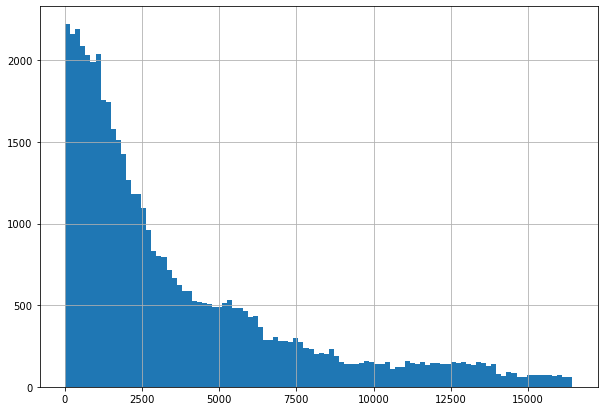

In [597]:
df['ranking'].hist(bins=100, figsize=(10, 7))

<AxesSubplot:>

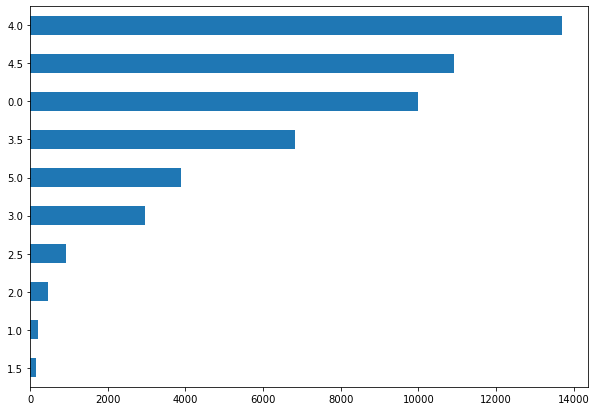

In [598]:
df['rating'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

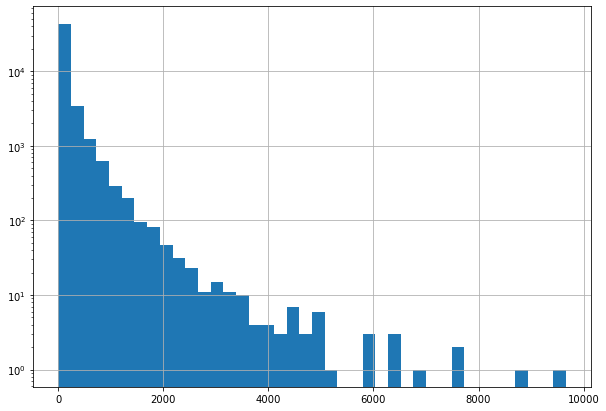

In [599]:
df['number_of_reviews'].hist(bins=40, log=True, figsize=(10, 7))

In [600]:
all_column = df.columns.tolist()  # cоздаю список со всеми числовыми столбцами
all_col_not_object = [
    'ranking',
    'price_range',
    'number_of_reviews',
    'id_ta',
    'rating',
    'number_of_rev_is_NAN',
    'cuisine_style_is_NAN',
    'last_review_recency',
    'len_cuisine',
    'is_capital',
    'net_count',
    'net_restaurant',
    'population',
    'tourism',
    'big_mac_index',
    'restaurants_count',
    'mark_5',
    'mark_4',
    'mark_3',
    'mark_2',
    'mark_1',
    'last_review_date_is_NAN',
    'mark__NaN',
    'mark_sum',
    'ranking_rel_restaurant_count',
    'ranking_rel_tourism',
    'restaurants_count_rel_tourism',
    'mark_sum_rel_ranking',
    'number_of_reviews_rel_ranking',
    'number_of_reviews_rel_id_ta',
    'c_Amsterdam',
    'c_Athens',
    'c_Barcelona',
    'c_Berlin',
    'c_Bratislava',
    'c_Brussels',
    'c_Budapest',
    'c_Copenhagen',
    'c_Dublin',
    'c_Edinburgh',
    'c_Geneva',
    'c_Hamburg',
    'c_Helsinki',
    'c_Krakow',
    'c_Lisbon',
    'c_Ljubljana',
    'c_London',
    'c_Luxembourg',
    'c_Lyon',
    'c_Madrid',
    'c_Milan',
    'c_Munich',
    'c_Oporto',
    'c_Oslo',
    'c_Paris',
    'c_Prague',
    'c_Rome',
    'c_Stockholm',
    'c_Vienna',
    'c_Warsaw',
    'c_Zurich']

In [601]:
len(all_col_not_object)

61

### Посмотрим на корреляцию
Разделяю датасет на 2 половины, чтобы получше рассмотреть каждый признак

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 [Text(0.5, 0, 'ranking'),
  Text(1.5, 0, 'price_range'),
  Text(2.5, 0, 'number_of_reviews'),
  Text(3.5, 0, 'id_ta'),
  Text(4.5, 0, 'rating'),
  Text(5.5, 0, 'number_of_rev_is_NAN'),
  Text(6.5, 0, 'cuisine_style_is_NAN'),
  Text(7.5, 0, 'last_review_recency'),
  Text(8.5, 0, 'len_cuisine'),
  Text(9.5, 0, 'is_capital'),
  Text(10.5, 0, 'net_count'),
  Text(11.5, 0, 'net_restaurant'),
  Text(12.5, 0, 'population'),
  Text(13.5, 0, 'tourism'),
  Text(14.5, 0, 'big_mac_index'),
  Text(15.5, 0, 'restaurants_count'),
  Text(16.5, 0, 'mark_5'),
  Text(17.5, 0, 'mark_4'),
  Text(18.5, 0, 'mark_3'),
  Text(19.5, 0, 'mark_2'),
  Text(20.5, 0, 'mark_1'),
  Text(21.5, 0, 'last_review_date_is_NAN'),
  Text(22.5, 0, 'mark__NaN'),
  Text(23.5, 0, 'mark_sum'),
  Text(24.5, 0, 'ranking_rel_resta

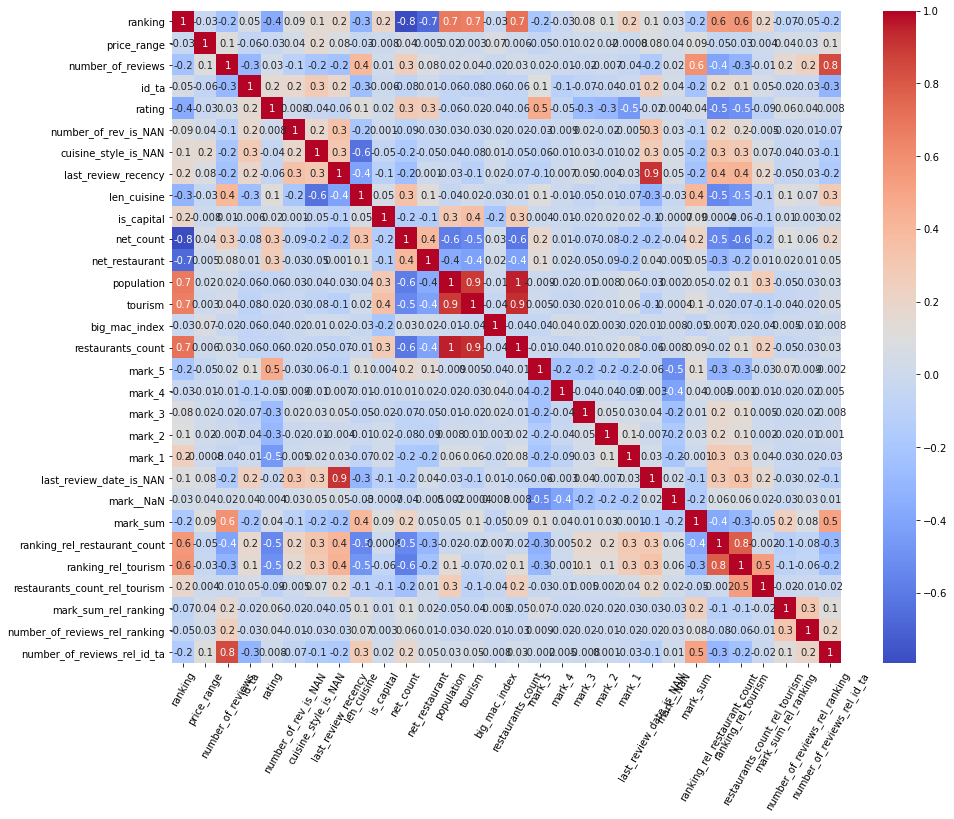

In [602]:
df_train = df[df['sample'] == 1]
df_test = df[df['sample'] == 0]

correlation = df_train[all_col_not_object[:30]].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, fmt='.1g', cmap='coolwarm')
plt.xticks(rotation=60)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 [Text(0.5, 0, 'rating'),
  Text(1.5, 0, 'c_Amsterdam'),
  Text(2.5, 0, 'c_Athens'),
  Text(3.5, 0, 'c_Barcelona'),
  Text(4.5, 0, 'c_Berlin'),
  Text(5.5, 0, 'c_Bratislava'),
  Text(6.5, 0, 'c_Brussels'),
  Text(7.5, 0, 'c_Budapest'),
  Text(8.5, 0, 'c_Copenhagen'),
  Text(9.5, 0, 'c_Dublin'),
  Text(10.5, 0, 'c_Edinburgh'),
  Text(11.5, 0, 'c_Geneva'),
  Text(12.5, 0, 'c_Hamburg'),
  Text(13.5, 0, 'c_Helsinki'),
  Text(14.5, 0, 'c_Krakow'),
  Text(15.5, 0, 'c_Lisbon'),
  Text(16.5, 0, 'c_Ljubljana'),
  Text(17.5, 0, 'c_London'),
  Text(18.5, 0, 'c_Luxembourg'),
  Text(19.5, 0, 'c_Lyon'),
  Text(20.5, 0, 'c_Madrid'),
  Text(21.5, 0, 'c_Milan'),
  Text(22.5, 0, 'c_Munich'),
  Text(23.5, 0, 'c_Oporto'),
  Text(24.5, 0, 'c_Oslo'),
  Text(25.5, 0, 'c_Paris'),
  Text(26.5, 0,

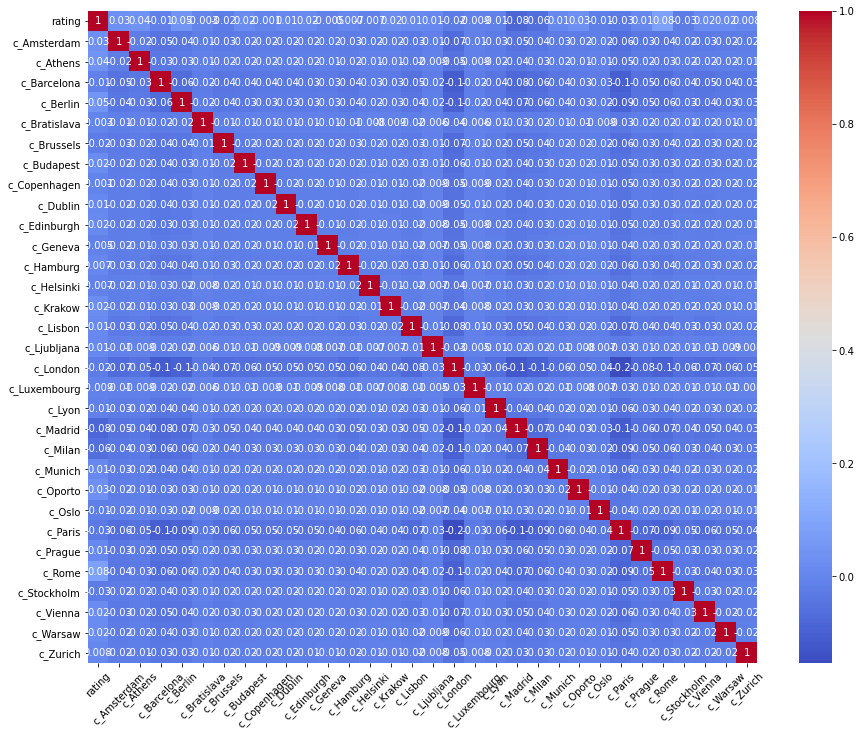

In [603]:
correlation1 = df_train[[all_col_not_object[4]]+all_col_not_object[30:]].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation1, annot=True, fmt='.1g', cmap='coolwarm')
plt.xticks(rotation=45)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [604]:
y = df_train.rating
all_col_not_object.remove('rating')
X = df_train[all_col_not_object]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

In [605]:
regr = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred,))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


MAE: 0.18531199999999998


In [606]:
# создаю словарь с признаками, сортированными в порядке значимости
dict1 = dict(zip(all_col_not_object, regr.feature_importances_.tolist()))
sorted_tuples = sorted(dict1.items(), key=lambda item: item[1], reverse=True)
sorted_dict = OrderedDict({k: v for k, v in sorted_tuples})
sorted_dict

OrderedDict([('ranking_rel_restaurant_count', 0.5157702586982059),
             ('mark_5', 0.1226538912592345),
             ('number_of_reviews', 0.07207097036027701),
             ('c_Rome', 0.039510884496249545),
             ('mark_1', 0.0357510466118711),
             ('ranking_rel_tourism', 0.02941057725569464),
             ('number_of_reviews_rel_ranking', 0.022079801868105948),
             ('ranking', 0.02052647143302999),
             ('id_ta', 0.016685442278353776),
             ('mark_3', 0.016522645934389874),
             ('number_of_reviews_rel_id_ta', 0.012047626323300495),
             ('last_review_recency', 0.011818723759646524),
             ('mark_2', 0.011007990712887064),
             ('mark_sum_rel_ranking', 0.010358614710628938),
             ('mark_4', 0.008589385271109105),
             ('mark_sum', 0.007460250145356033),
             ('len_cuisine', 0.006325491071883406),
             ('net_count', 0.004998360837491942),
             ('population', 0.004318

In [607]:
# Пробую использовать только признаки со значимостью более заданного порога 0,002
threshold = 2e-3
new_list = list(i for i, v in sorted_dict.items() if v > threshold)
print(len(new_list))
new_list

24


['ranking_rel_restaurant_count',
 'mark_5',
 'number_of_reviews',
 'c_Rome',
 'mark_1',
 'ranking_rel_tourism',
 'number_of_reviews_rel_ranking',
 'ranking',
 'id_ta',
 'mark_3',
 'number_of_reviews_rel_id_ta',
 'last_review_recency',
 'mark_2',
 'mark_sum_rel_ranking',
 'mark_4',
 'mark_sum',
 'len_cuisine',
 'net_count',
 'population',
 'restaurants_count_rel_tourism',
 'tourism',
 'restaurants_count',
 'big_mac_index',
 'price_range']

In [608]:
X = df_train[new_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

In [609]:
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred,))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


MAE: 0.18606449999999997


Результат практически не изменился, несмотря на удаление более половины признаков. Можно предположить, что итоговое предсказание будет лучше с меньшим кол-вом признаков, т.к. это уменьшит влияние переобученности модели.


In [610]:
# Для сравнения смотрю ошибку на тренировочном наборе данных. Она мала, что может свидетельствовать о переобученности модели.
y_pred = regr.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred,))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


MAE: 0.06963416666666664


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


In [611]:
# Обучаем модель на полном наборе данных
y = df_train.rating
X = df_train[new_list]
regr.fit(X, y)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(df_test[new_list])
y_pred

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([3.185, 4.365, 3.915, ..., 3.14 , 4.495, 4.235])

## Submission

In [612]:
df_test.rating = np.around(y_pred*2)/2
submission = df_test[['restaurant_id', 'rating']]
submission.columns = ['Restaurant_id', 'Rating'] # На всякий случай восстанавливаю имена колонок
submission.to_csv('submission.csv', index=False)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Заключение
На основании данных о ресторанах создана модель, предсказывающая рейтинг ресторана на сайте TripAdvisor.

Результат в соревновании Kaggle - точность MAE предсказания 0.15230.
Ник на Kaggle - Michael Krivchikov.
